# Wine Analysis

### This notebook shows some interesting patterns that exist in the [Global Wine Points](https://data.world/markpowell/global-wine-points) dataset that can be found on data.world.

#### The dataset was created by Mark Powell so a massive thanks goes out to him for creating such an interesting dataset.

In [1]:
import re

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_excel(r'https://query.data.world/s/5z5a6phj6xbcpgb55fao7bu6hhhlnp')

#### Cleaning up some of the columns to increase the analysis that can occur.

*This analysis has a large focus on the price of each of the wines and for that reason rows with no price value will be dropped since interpolating their results would be challenging and would possible lead to incorrect assumptions.*

In [2]:
#Price column is an object column type by default by we will want to convert that to a numeric type.
df.dropna(subset=['Price'],inplace=True)
df['Price'] = df['Price'].apply(lambda x: float(re.sub(r'[,\$]','',x)))


#### First things first, let's see what countries have the most wines in this dataset

In [3]:
popCountries = pd.DataFrame(df['Country'].value_counts().head().reset_index())

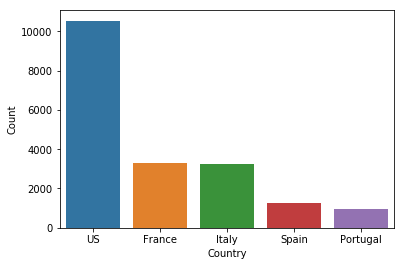

In [4]:
popCountriesBar = sns.barplot(data=popCountries,x='index',y='Country')
popCountriesBar.set(xlabel='Country', ylabel='Count')
plt.show()

#### The US seems to be produce the most wine (according to this dataset). Let's see some specific numbers that display this production different between the top 5 countries.

In [5]:
popCountries.rename({'index':'Country','Country':'Count'},axis=1,inplace=True)
#Show the difference between the US and the other countries in the top 5.
popCountries

,Country,Count
0,US,10538
1,France,3286
2,Italy,3228
3,Spain,1239
4,Portugal,973


#### Let's compare the US to all of the other countries (France, Italy, Spain, Portugal) in the top 5

In [6]:
usAndNotUs = popCountries.copy()
usAndNotUs['Country'] = usAndNotUs['Country'].apply(lambda x: 'US' if x == 'US' else 'Not US')
usAndNotUs = usAndNotUs.groupby('Country')['Count'].sum().reset_index()

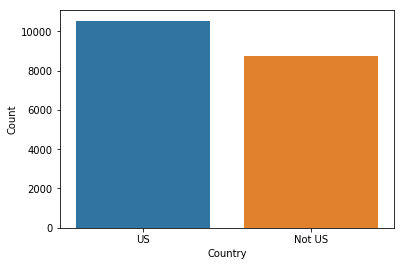

In [7]:
usAndNotUs.sort_values('Count',ascending=False,inplace=True)
usAndNotUsBar = sns.barplot(data=usAndNotUs,x='Country',y='Count')
plt.show()

#### Price Analysis
*There is quite a few nulls in the price column of this dataset so those will be dropped for this analysis since interpolating the results would be difficult and most likely not reflect the actual prices.*

#### Let's look at the top 5 countries in this dataset and the mean price for their wines

In [8]:
popCountriesPrice = df[df['Country'].isin(popCountries['Country'].tolist())]
popCountriesPrice = popCountriesPrice.groupby('Country')['Price'].mean().reset_index()

In [9]:
popCountriesPrice.sort_values('Price',ascending=False,inplace=True)

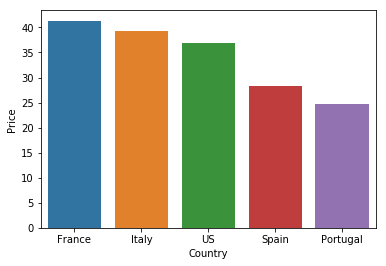

In [10]:
popCountriesPriceBar = sns.barplot(data=popCountriesPrice,x='Country',y='Price')
plt.show()

#### Let's see the specific numbers for each of the countries

In [11]:
popCountriesPrice

,Country,Price
0,France,41.340231
1,Italy,39.318773
4,US,36.917821
3,Spain,28.307506
2,Portugal,24.620761


#### Now to answer the question that everyone has been thinking about: Do you have to buy an expensive bottle of wine to get a *good one?

*A good wine in this analysis is one that scores high on the points scale*

#### To start off this analysis lets look at a scatterplot between price and points

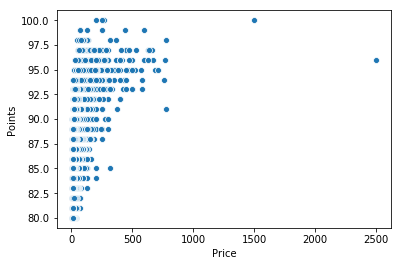

In [12]:
pricePointsScatter = sns.scatterplot(data=df,x='Price',y='Points')
plt.show()

#### Seems like some outliers are really taking away from the effectiveness of the scatterplot, let's drop them then.

*In this analysis any wine that costs more than 500$ will be dropped, since most people aren't prepared to spend their rent on a liquid made from grapes*

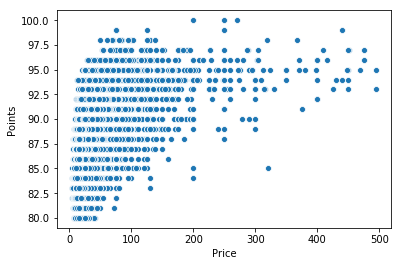

In [13]:
pricesPointsSubset = df[df['Price']<500]
pricePointsScatter = sns.scatterplot(data=pricesPointsSubset,x='Price',y='Points')

#### Charts are nifty but what we want to see is a number that confirms once and for all that you don't need to spend a massive amount of money to get a good wine.

*We will then calculate the correlation coefficient between the price and points column in this dataset.*

In [14]:
pricePointsCorrel = pricesPointsSubset[['Price','Points']].corr()
pricePointsCorrel

,Price,Points
Price,1.000000,0.497197
Points,0.497197,1.000000


#### A correlation cofficient of ~0.50 makes it seem like you don't have to break the bank to get a good bottle of vino.

#### Now that the point above has been proven the next step is to determine what are the best *'bang for your buck wines'
*Bang for your buck in the case of this dataset would be equal to wine with a low price and a high score in the points columns*

To find the wines that are the cheapest/most affordable and scored the best in terms of points we simply need to sort the base DataFrame by the price in **ascending** order and then the points in **descending** order. - See code below

In [29]:
bfybWines  = df.sort_values(['Price','Points'],ascending=[True,False]).head(10)
bfybWines

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery
6133,2009-01-01 00:00:00,Argentina,Mendoza,Red,84,4.0,Mendoza Province,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass
21758,2014-01-01 00:00:00,US,California,Organic Grapes,85,5.0,California,Earth's Harvest 2014 Organic Grapes Chardonnay...,Chardonnay,Earth's Harvest
1956,2006-01-01 00:00:00,Australia,South Eastern Australia,NaN,83,5.0,Australia Other,Kelly's Revenge 2006 Chardonnay (South Eastern...,Chardonnay,Kelly's Revenge
13141,2012-01-01 00:00:00,Spain,Yecla,Estate Bottled,83,5.0,Levante,Terrenal 2012 Estate Bottled Cabernet Sauvigno...,Cabernet Sauvignon,Terrenal
683,2002-01-01 00:00:00,Chile,NaN,Gato Negro,82,5.0,Lontué Valley,San Pedro 2002 Gato Negro Merlot (Lontué Valley),Merlot,San Pedro
604,2001-01-01 00:00:00,US,Idaho,Dry,88,6.0,Idaho,Ste. Chapelle 2001 Dry Riesling (Idaho),Riesling,Ste. Chapelle
2164,2006-01-01 00:00:00,US,Washington,NaN,87,6.0,Washington,Pine & Post 2006 Chardonnay (Washington),Chardonnay,Pine & Post
16716,2013-01-01 00:00:00,Germany,NaN,Kabinett,87,6.0,Mosel,Johannes Kunz 2013 Kabinett Riesling (Mosel),Riesling,Johannes Kunz
24555,2016-01-01 00:00:00,Chile,NaN,120 Reserva Especial,87,6.0,Central Valley,Santa Rita 2016 120 Reserva Especial Chardonna...,Chardonnay,Santa Rita
23798,2015-01-01 00:00:00,Portugal,NaN,Casaleiro Colheita Seleccionada,86,6.0,Tejo,Caves Velhas 2015 Casaleiro Colheita Seleccion...,Portuguese Red,Caves Velhas


#### Another way of looking at some of the wines is by creating a weighting system based off of their price and points.
In this analysis the following weighting will be applied:
+ The price will be multiplied by -0.5 since a lower price is more desireable.
+ The points will be multiplied by +0.8 since a higher score is more desireable.

The code below shows the creation of the PP_Weight column (Price-Points) and then the creation of a new DataFrame that only contains the price, points and PP_Weight column.

In [40]:
#Creation of new column 'PP_Weight'
weightedDF = df.copy()

weightedDF['PP_Weight'] = weightedDF.apply(lambda x: (x['Price']*-0.5 + x['Points']*0.8),axis=1)
                                           
dropColumns = [col for col in weightedDF.columns if col not in ['Price','Points','PP_Weight','Title']]
                                           
weightedDFSub = weightedDF.drop(dropColumns,axis=1)
                                           
weightedDFSub.sort_values('PP_Weight',ascending=False,inplace=True)
                                           
ppWeightTop10 = weightedDFSub.head(10)
                                           
ppWeightTop10.set_index('Title',inplace=True)
                                           
ppWeightTop10

,Points,Price,PP_Weight
Title,,,
Quinta dos Murças 2011 Assobio Red (Douro),94,13.0,68.7
Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),94,14.0,68.2
Pedra Cancela 2010 Seleção do Enólogo Red (Dão),92,11.0,68.1
Caves Aliança 2011 Aliança Reserva Red (Dão),91,10.0,67.8
Lujon 2015 Riesling (Willamette Valley),91,10.0,67.8
Chateau de l'Oiselinière 2014 Les Grands Gâts Sur Lie (Muscadet Sèvre et Maine),91,10.0,67.8
Lujon 2009 Pinot Gris (Willamette Valley),92,12.0,67.6
Bacalhôa Wines of Portugal 2007 Catarina White (Terras do Sado),92,12.0,67.6
Aveleda 2009 Quinta da Aveleda White (Vinho Verde),90,9.0,67.5


#### An analysis that could lead to some interesting results would be seeing what countries have the highest mean for the PP_Weight column.

The code below will look at the top 5 countries based off of PP_Weight and create a chart displaying them.

In [45]:
weightedDF.sort_values('PP_Weight',inplace=True,ascending=False)
meanPPWeight = weightedDF.groupby('Country')['PP_Weight'].mean().reset_index()

In [48]:
meanPPWeight.sort_values('PP_Weight',inplace=True,ascending=False)
meanPPWeightTop5 = meanPPWeight.head(5)
meanPPWeightTop5

,Country,PP_Weight
35,Ukraine,64.200000
15,India,64.100000
4,Bulgaria,62.361290
20,Macedonia,61.875000
22,Moldova,61.690909


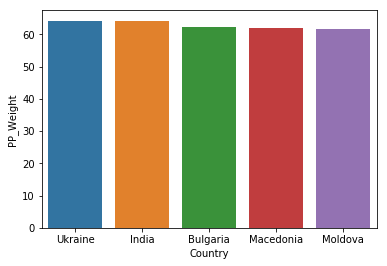

In [49]:
meanPPWeightBar = sns.barplot(data=meanPPWeightTop5,x='Country',y='PP_Weight')
plt.show()

#### Some of the countries in the chart above are unexpected, and raise the question of how many different wines did they have in the dataset to begin with?

The code below shows how many rows in the dataset are from each of the countries in the chart above to see if there is a sufficient amount of data to include them in this analysis.

In [53]:
countryValCount = dict(df['Country'].value_counts())

#Showing the a sample of the dictionary that contains the row counts for each of the countries in the dataset.
print(dict(zip(list(countryValCount.keys())[:5],list(countryValCount.values())[:5])))

{'US': 10538, 'France': 3286, 'Italy': 3228, 'Spain': 1239, 'Portugal': 973}


In [55]:
outList = [] # <- This will be used to store the country name and row count for each of the countries in the top 5.
for i,row in meanPPWeightTop5.iterrows():
    outList.append([row['Country'],countryValCount[row['Country']]])

meanPPWeightTop5Check = pd.DataFrame(outList,columns=['Country','Row Count'])
meanPPWeightTop5Check

,Country,Row Count
0,Ukraine,3
1,India,1
2,Bulgaria,31
3,Macedonia,4
4,Moldova,11


#### Each of the countries in the orginal meanPPWeightTop5 DataFrame account for a miniscule portion (0.213%) of the overall dataset and therefore we will complete the analysis again but this time only look at countries that have more than 30 rows in the dataset.

In [62]:
meanPPWeight['Row Count'] = meanPPWeight['Country'].map(countryValCount)

In [66]:
meanPPWeightTop5V2 = meanPPWeight[meanPPWeight['Row Count'] > 30].sort_values('PP_Weight',ascending=False).head(5)

In [67]:
meanPPWeightTop5V2

,Country,PP_Weight,Row Count
4,Bulgaria,62.361290,31
6,Chile,58.984657,919
13,Greece,58.734247,73
26,Portugal,58.410277,973
2,Austria,57.474165,569


#### Now the countries that appear in the list have a larger wine sample base to choose from. The only country that remained in the original meanPPWeightTop5 and this one is Bulgaria. 

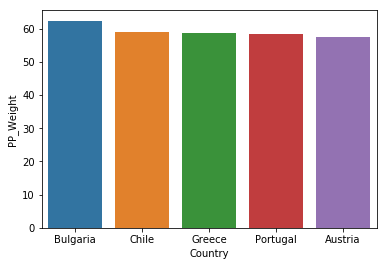

In [69]:
# Visual the results for consistency
meanPPWeightBarV2 = sns.barplot(data=meanPPWeightTop5V2,x='Country',y='PP_Weight')
plt.show()

### If you made it this far I would like to thank you for finding it interesting enough to dedicate the time towards reading it.

**If you found any inconsistencies or have any recommendations for further analysis please feel free to reach out.**